In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train= pd.read_csv('data_reviews/x_train.csv')
y_train= pd.read_csv('data_reviews/y_train.csv')

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [4]:
import math

In [5]:
import re
import nltk

In [6]:
#lower case
x_train['text_processed'] = x_train['text'].map(lambda x: x.lower())

# contractions
def contractions(s):
    s = re.sub(r"won’t", "will not",s)
    s = re.sub(r"would’t","would not",s)
    s = re.sub(r"could’t", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
x_train['text_processed'] = x_train['text_processed'].map(lambda x: contractions(x))

x_train['text_processed'] = x_train['text_processed'].map(lambda x: re.sub('[.!,\.?()0123456789:;\x85\x96\x97"#$%&()\[\]*+-/\']', '', x))

# remove non-alpha words
import nltk
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))

# remove extra spaces
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: re.sub(' +',' ', x))

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train['1'] = x_train['text_processed'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
x_train['1'] = x_train['1'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
x_train['2'] = x_train['text_processed'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [9]:
# # count vectorizor, 'text processed'

In [10]:
a = np.logspace(-2,2,10)
a

array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])

In [25]:
# countvectorize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


param_grid = {'svc__C':np.logspace(-2,2,10), 'svc__kernel': ['linear','poly','rbf', 'sigmoid'],
              'svc__gamma': ['scale', 'auto'],
              'svc__max_iter': np.logspace(0,3,10)
             }
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('svc', SVC(probability = True))
    ]
)
grid = GridSearchCV(pipeline, param_grid, return_train_score = True, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.cv_results_)
# print(grid.best_params_)
# print(grid.best_score_)

C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'svc__max_iter': array([   1.        ,    2.15443469,    4.64158883,   10.        ,
         21.5443469 ,   46.41588834,  100.        ,  215.443469  ,
        464.15888336, 1000.        ])},
             return_train_score=True)

In [120]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__C': 0.0774263682681127, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 1000.0}
0.7966666666666666


In [27]:
print(grid.cv_results_)
a = grid.cv_results_['rank_test_score'] <= 20
print(np.array(grid.cv_results_['params'])[a])
print(np.array(grid.cv_results_['mean_test_score'])[a])

{'mean_fit_time': array([0.13587332, 0.08648686, 0.07598166, 0.09773951, 0.12028666,
       0.17346454, 0.2890214 , 0.62837105, 1.66476588, 3.36255774,
       0.11531382, 0.11320148, 0.12421846, 0.13927994, 0.16403346,
       0.23680902, 0.39395728, 0.81297088, 2.05157213, 3.54981585,
       0.06858325, 0.10156636, 0.10304804, 0.14284191, 0.17445049,
       0.20161576, 0.3253655 , 0.8387135 , 1.75395551, 3.19953346,
       0.07239537, 0.06849961, 0.08187237, 0.1130578 , 0.17183018,
       0.28364367, 0.45918217, 0.79389338, 1.73904681, 3.10363555,
       0.06681881, 0.0749826 , 0.07985029, 0.09294324, 0.12169337,
       0.1565238 , 0.28553238, 0.60806136, 1.56158338, 2.81490006,
       0.06883912, 0.08237004, 0.09300733, 0.09390392, 0.11351194,
       0.1686543 , 0.29400864, 0.63944831, 1.58192301, 3.21294627,
       0.06920481, 0.0777801 , 0.07781758, 0.09351244, 0.12746491,
       0.18514833, 0.36108212, 0.73159366, 1.65107126, 3.33480301,
       0.06479092, 0.07996273, 0.08642578, 0

In [35]:
def log_iter(row):
    return math.log(row['param_svc__max_iter'], 10)
def logC(row):
    return math.log(row['param_svc__C'], 10)


d = pd.DataFrame.from_dict(grid.cv_results_)
d['log_c'] = d.apply(lambda row: logC(row), axis = 1)
d['log_iter'] = d.apply(lambda row: log_iter(row), axis = 1)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,param_svc__max_iter,params,split0_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,log_c,log_iter
0,0.135873,0.019701,0.015543,0.007803,0.01,scale,linear,1.0,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.500000,...,667,0.498437,0.497917,0.497917,0.500000,0.511979,0.501250,0.005419,-2.0,0.000000
1,0.086487,0.016407,0.017818,0.002986,0.01,scale,linear,2.154435,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.502083,...,535,0.498958,0.498958,0.502083,0.500521,0.515625,0.503229,0.006305,-2.0,0.333333
2,0.075982,0.007309,0.017023,0.004507,0.01,scale,linear,4.641589,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.525000,...,267,0.525000,0.528125,0.538542,0.500521,0.521354,0.522708,0.012485,-2.0,0.666667
3,0.097740,0.002524,0.015558,0.001196,0.01,scale,linear,10.0,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.522917,...,413,0.507812,0.503125,0.510938,0.500521,0.505729,0.505625,0.003614,-2.0,1.000000
4,0.120287,0.001857,0.016754,0.002309,0.01,scale,linear,21.544347,"{'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__...",0.520833,...,407,0.516146,0.505208,0.511458,0.505208,0.506771,0.508958,0.004262,-2.0,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.215575,0.011690,0.018742,0.006250,100.0,auto,sigmoid,46.415888,"{'svc__C': 100.0, 'svc__gamma': 'auto', 'svc__...",0.502083,...,389,0.516667,0.516667,0.508333,0.513021,0.508854,0.512708,0.003617,2.0,1.666667
796,0.378036,0.024994,0.031245,0.000005,100.0,auto,sigmoid,100.0,"{'svc__C': 100.0, 'svc__gamma': 'auto', 'svc__...",0.510417,...,376,0.525000,0.506771,0.532813,0.503646,0.509375,0.515521,0.011351,2.0,2.000000
797,0.783519,0.018336,0.040616,0.007653,100.0,auto,sigmoid,215.443469,"{'svc__C': 100.0, 'svc__gamma': 'auto', 'svc__...",0.500000,...,303,0.514583,0.513021,0.545312,0.512500,0.510938,0.519271,0.013073,2.0,2.333333
798,1.949612,0.049775,0.087479,0.007653,100.0,auto,sigmoid,464.158883,"{'svc__C': 100.0, 'svc__gamma': 'auto', 'svc__...",0.514583,...,225,0.539062,0.533333,0.538542,0.565104,0.535417,0.542292,0.011597,2.0,2.666667


In [44]:
d_sc = d[d['param_svc__gamma'] == 'scale']
d_au = d[d['param_svc__gamma'] == 'auto']
print(np.mean(d_sc['mean_test_score']))
print(np.mean(d_au['mean_test_score']))

0.5554166666666671
0.5321520833333329


In [42]:
d_li = d[d['param_svc__kernel'] == 'linear']
d_li = d_li[d_li['param_svc__gamma'] == 'scale']
d_po = d[d['param_svc__kernel'] == 'poly']
d_po = d_po[d_po['param_svc__gamma'] == 'scale']
d_si = d[d['param_svc__kernel'] == 'sigmoid']
d_si = d_si[d_si['param_svc__gamma'] == 'scale']
d_rbf = d[d['param_svc__kernel'] == 'rbf']
d_rbf = d_rbf[d_rbf['param_svc__gamma'] == 'scale']

In [55]:
np.linspace(-2,2,10)
np.linspace(0,3,10)

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

In [97]:
def change_matrix(df, z):
    for index, i in df.iterrows():
        x = round((i['log_c'] + 2)/(4/9))
        y = round((i['log_iter'])/(1/3))
#         print(x)
#         print(y)
        z[y,x] = i['mean_test_score']
    return z

<Figure size 576x396 with 0 Axes>

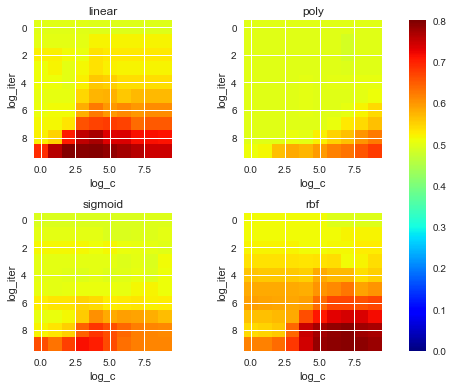

In [117]:
# linear
z = np.zeros((10,10))
z = change_matrix(d_li,z)

plt.suptitle('SVC Scores For Activation Functions')

fig, axs = plt.subplots(2,2)

plt.subplot(2,2,1)
plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.xlabel('log_c')
plt.ylabel('log_iter')
plt.title('linear')

plt.subplot(2,2,2)
z = np.zeros((10,10))
z = change_matrix(d_po,z)
plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.xlabel('log_c')
plt.ylabel('log_iter')
plt.title('poly')

plt.subplot(2,2,3)
z = np.zeros((10,10))
z = change_matrix(d_si,z)
plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.xlabel('log_c')
plt.ylabel('log_iter')
plt.title('sigmoid')

plt.subplot(2,2,3)
z = np.zeros((10,10))
z = change_matrix(d_si,z)
plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.xlabel('log_c')
plt.ylabel('log_iter')
plt.title('sigmoid')

plt.subplot(2,2,4)
z = np.zeros((10,10))
z = change_matrix(d_rbf,z)
plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.xlabel('log_c')
plt.ylabel('log_iter')
plt.title('rbf')

plt.tight_layout()

plt.colorbar(ax = axs[:,:])

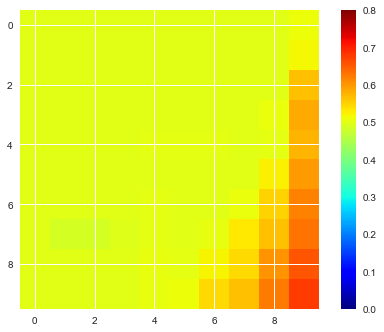

In [87]:
# poly
z = np.zeros((10,10))
z = change_matrix(d_po,z)

plt.imshow(z, cmap='jet', vmin=0, vmax=0.8, interpolation='nearest')
plt.colorbar()
plt.show()

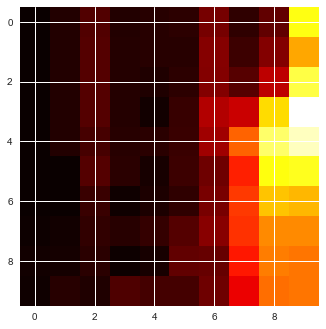

In [80]:
# sigmoid
z = np.zeros((10,10))
z = change_matrix(d_si,z)

plt.imshow(z, cmap='hot', interpolation='nearest')
plt.show()

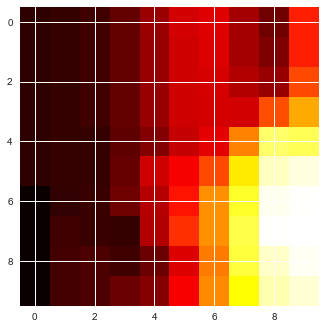

In [81]:
# rbf
# sigmoid
z = np.zeros((10,10))
z = change_matrix(d_rbf,z)

plt.imshow(z, cmap='hot', interpolation='nearest')
plt.show()